In [1]:
import pathlib
import pandas as pd
from odapi.connectors import Irceline
from odapi.toolbox.statistics import StatisticalTest 
from odapi.settings import settings
settings.logger.setLevel(50)

 - https://en.wikipedia.org/wiki/2010_eruptions_of_Eyjafjallaj%C3%B6kull
 - https://en.wikipedia.org/wiki/2014%E2%80%932015_eruption_of_B%C3%A1r%C3%B0arbunga
 - https://meetingorganizer.copernicus.org/EGU2015/EGU2015-11498.pdf
 - https://www.ecmwf.int/en/about

In [2]:
client = Irceline()

In [3]:
#client.events

In [7]:
sel = client.select(measurekey=["SO2"])#, sitekey="41")
recs = client.get_records(sel, start="2020-09-01", stop="2020-11-01").merge(sel[["serieid", "seriekey"]])
ts = recs.pivot_table(index="start", columns="seriekey", values="value")

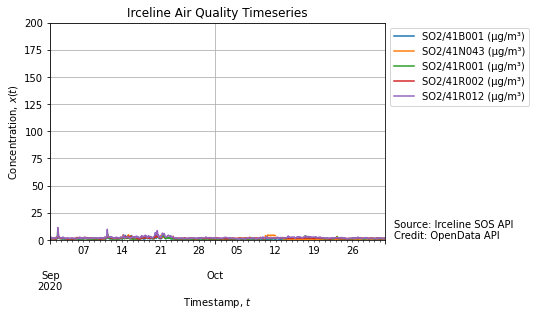

In [9]:
axe = ts.filter(regex="SO2/41", axis=1).plot()
axe.set_title("Irceline Air Quality Timeseries")
axe.set_xlabel("Timestamp, $t$")
axe.set_ylabel("Concentration, $x(t)$")
axe.figure.text(0.92, 0.13, "Source: Irceline SOS API\nCredit: OpenData API")
axe.set_ylim([0, 200])
axe.legend(bbox_to_anchor=(1,1), loc="upper left")
axe.grid()

In [10]:
sel = client.select(measurekey=["SO2"])#, sitekey="41")
recs = client.get_records(sel, start="2014-09-15", stop="2014-09-30").merge(sel[["serieid", "seriekey"]])
ts = recs.pivot_table(index="start", columns="seriekey", values="value")

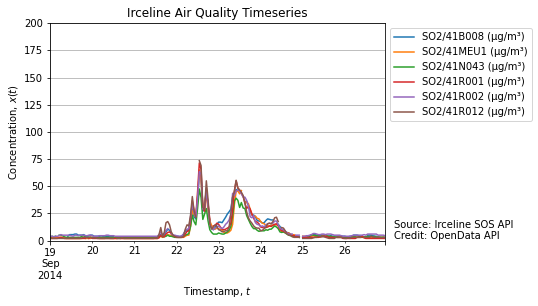

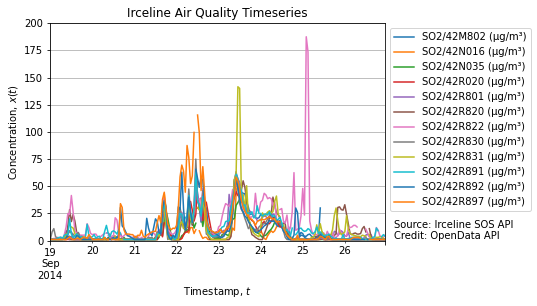

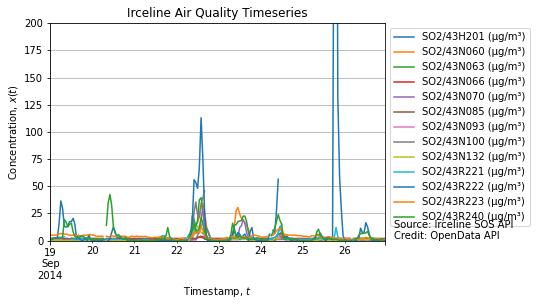

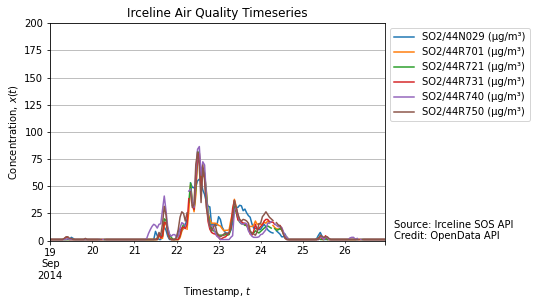

In [11]:
for key in ["41", "42", "43", "44"]:
    axe = ts.loc["2014-09-19":"2014-09-26",:].filter(regex="SO2/%s" % key, axis=1).plot()
    axe.set_title("Irceline Air Quality Timeseries")
    axe.set_xlabel("Timestamp, $t$")
    axe.set_ylabel("Concentration, $x(t)$")
    axe.figure.text(0.92, 0.13, "Source: Irceline SOS API\nCredit: OpenData API")
    axe.set_ylim([0, 200])
    axe.legend(bbox_to_anchor=(1,1), loc="upper left")
    axe.grid()

In [12]:
sel = client.select(measurekey=["SO2"])#, sitekey="41")
recs = client.get_records(sel, start="2021-09-15", stop="2021-09-30").merge(sel[["serieid", "seriekey"]])
ts = recs.pivot_table(index="start", columns="seriekey", values="value")

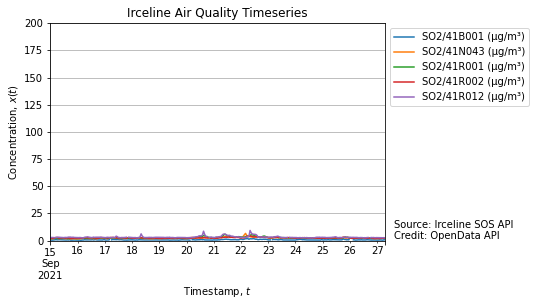

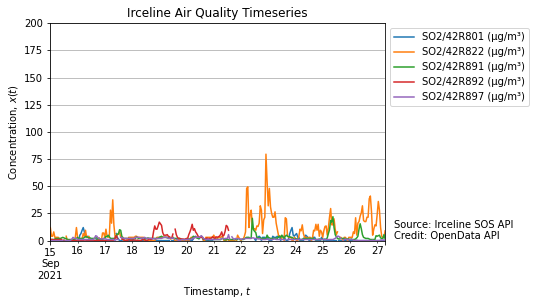

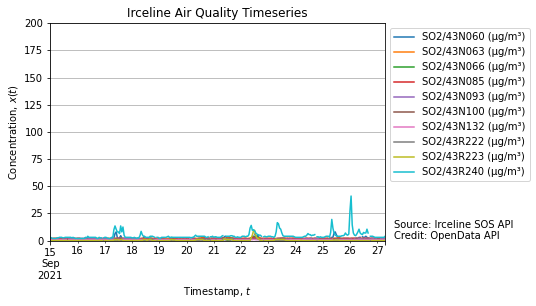

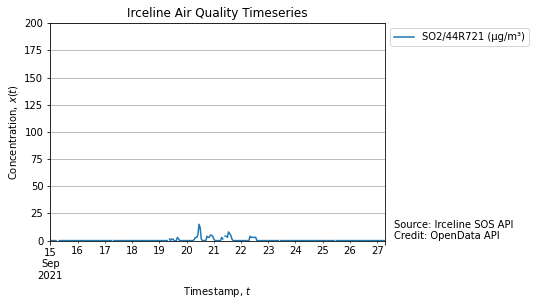

In [13]:
for key in ["41", "42", "43", "44"]:
    axe = ts.loc[:,:].filter(regex="SO2/%s" % key, axis=1).plot()
    axe.set_title("Irceline Air Quality Timeseries")
    axe.set_xlabel("Timestamp, $t$")
    axe.set_ylabel("Concentration, $x(t)$")
    axe.figure.text(0.92, 0.13, "Source: Irceline SOS API\nCredit: OpenData API")
    axe.set_ylim([0, 200])
    axe.legend(bbox_to_anchor=(1,1), loc="upper left")
    axe.grid()

In [14]:
m = client.meta.loc[client.meta["seriekey"].str.match("SO2/4[1234]"),["seriekey", "sitename", "nuts3id"]].sort_values("seriekey")

In [15]:
m

,seriekey,sitename,nuts3id
501,SO2/41B001 (µg/m³),Arts-Loi,BE100
497,SO2/41B008 (µg/m³),Brussel (Beliardstraat),BE100
502,SO2/41MEU1 (µg/m³),Meudon,BE100
503,SO2/41N043 (µg/m³),Haren,BE100
504,SO2/41R001 (µg/m³),Molenbeek-Saint-Jean,BE100
505,SO2/41R002 (µg/m³),Ixelles,BE100
506,SO2/41R012 (µg/m³),Uccle,BE100
507,SO2/42M802 (µg/m³),Antwerpen,BE211
508,SO2/42N016 (µg/m³),Dessel,BE213
509,SO2/42N035 (µg/m³),Aarschot,BE242
